# Computer Assignment #2

## Foundations for Inference

- **Ali Hamzehpour 810100129**
- **Mina Shirazi 810100250**
- **Mohammad Amin Yousefi 810100236**

# Task 1: Passengers of the sunken ship ‘RMS Lusitania’

## Description

In this task we are given a dataset consisting trip information of passengers we are asked to perform basic Data Analysis on it.

## Preprocessing

First, we have to do some preprocessing on our data to prepare it for the Analysis. 


In [8]:
import pandas as pd
df = pd.read_csv("task1.csv")

print("DataFrame Info:")
print(df.info())
print()
print("\nHead:")
print(df.head())
print()
print("\nTail:")
print(df.tail())
print()
print("\nDescriptive statistics:")
print(df.describe())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


Head:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0   


1. **DataFrame Info**:
   - We utilized the `df.info()` method to gain an overview of the dataset's structure. This output provides information on the total number of entries, the number of columns, their names, data types, counts of non-null values, and memory usage.

2. **Head**:
   - The `df.head()` method was employed to examine the first few rows of the dataset. This allowed us to quickly assess column names, data types, and sample values, providing an initial understanding of the dataset's content.

3. **Tail**:
   - Similarly, we used the `df.tail()` method to inspect the last few rows of the dataset. This aided in identifying any potential patterns or trends towards the end of the dataset that may not have been immediately apparent from the head.

4. **Descriptive Statistics**:
   - Descriptive statistics were computed using the `df.describe()` method to gain insights into the distribution and summary characteristics of numerical columns within the dataset. This analysis included the following summary metrics for each numeric column:
     - Count: Indicates the number of non-null values present in the column.
     - Mean: Represents the average value of the column.
     - Standard Deviation: Measures the dispersion or variability of values around the mean.
     - Minimum and Maximum: Denote the smallest and largest values observed in the column, respectively.
     - Percentiles (25th, 50th, and 75th): Values below which a given percentage of observations fall, providing insights into the distribution's spread.
   These descriptive statistics offer valuable insights into the central tendencies, variability, and distributional characteristics of the numeric data


 In the preprocessing phase, we transformed categorical variables into numerical format to prepare the data for analysis. This involved replacing categorical labels with corresponding numerical values for several columns.

In [9]:

df['sex'] = df['sex'].replace({'male': 0, 'female': 1})
df['class'] = df['class'].replace({'First': 1, 'Second': 2, 'Third': 3})
df['embarked'] = df['embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
df['who'] = df['who'].replace({'man': 0, 'woman': 1, 'child': 2})
df['embark_town'] = df['embark_town'].replace({'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2})
df['alive'] = df['alive'].replace({'yes': 1, 'no': 0})
df['adult_male'] = df['adult_male'].replace({True: 1, False: 0})


In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,0.0,3,0,1,NaN,0.0,0,False
1,1,1,1,38.0,1,0,71.2833,1.0,1,1,0,C,1.0,1,False
2,1,3,1,26.0,0,0,7.9250,0.0,3,1,0,NaN,0.0,1,True
3,1,1,1,35.0,1,0,53.1000,0.0,1,1,0,C,0.0,1,False
4,0,3,0,35.0,0,0,8.0500,0.0,3,0,1,NaN,0.0,0,True


In [11]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,0,27.0,0,0,13.00,0.0,2,0,1,NaN,0.0,0,True
887,1,1,1,19.0,0,0,30.00,0.0,1,1,0,B,0.0,1,True
888,0,3,1,NaN,1,2,23.45,0.0,3,1,0,NaN,0.0,0,False
889,1,1,0,26.0,0,0,30.00,1.0,1,0,1,C,1.0,1,True
890,0,3,0,32.0,0,0,7.75,2.0,3,0,1,NaN,2.0,0,True


**We generated a heatmap of the correlation matrix for numerical features in our dataset.**

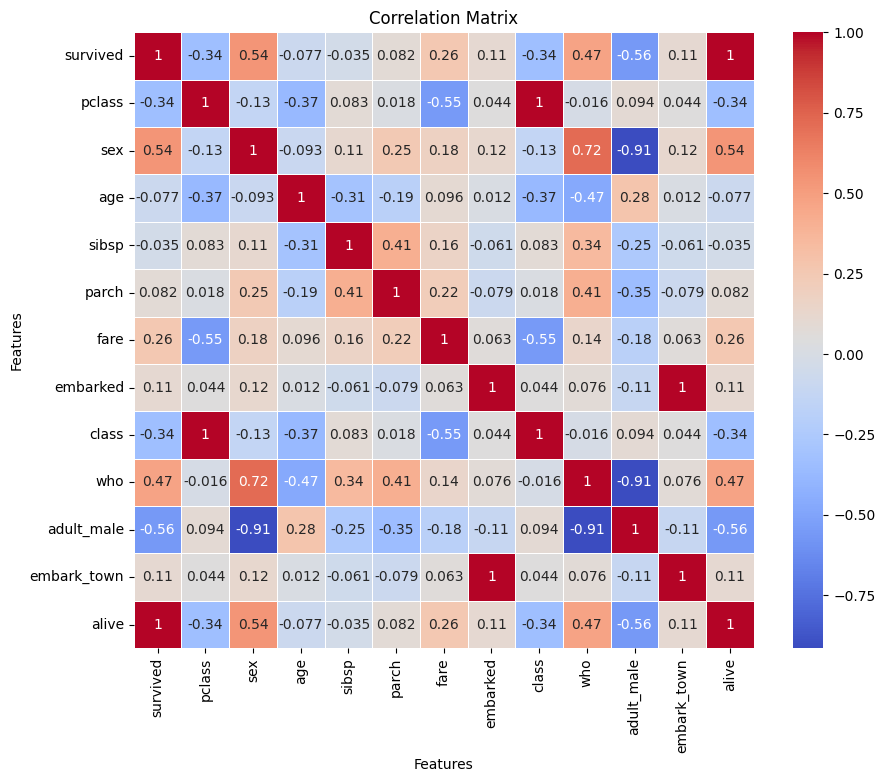

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = df.select_dtypes(include='number')
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)  
plt.title('Correlation Matrix')  
plt.xlabel('Features') 
plt.ylabel('Features')  
plt.show()

Based on our analysis, we identified columns that are not on the main diagonal and have a correlation coefficient of 1. This indicates redundancy, suggesting that one column is redundant and can be removed. Hence, we collectively decided to delete the extra columns meeting these conditions.

In [13]:
columns = corr_matrix.columns
columns_to_drop = []
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        if corr_matrix.iloc[i, j] == 1:
            columns_to_drop.append(columns[j])
print(columns_to_drop)

['alive', 'class', 'embark_town']


In [14]:
df.drop(columns=columns_to_drop, inplace=True)

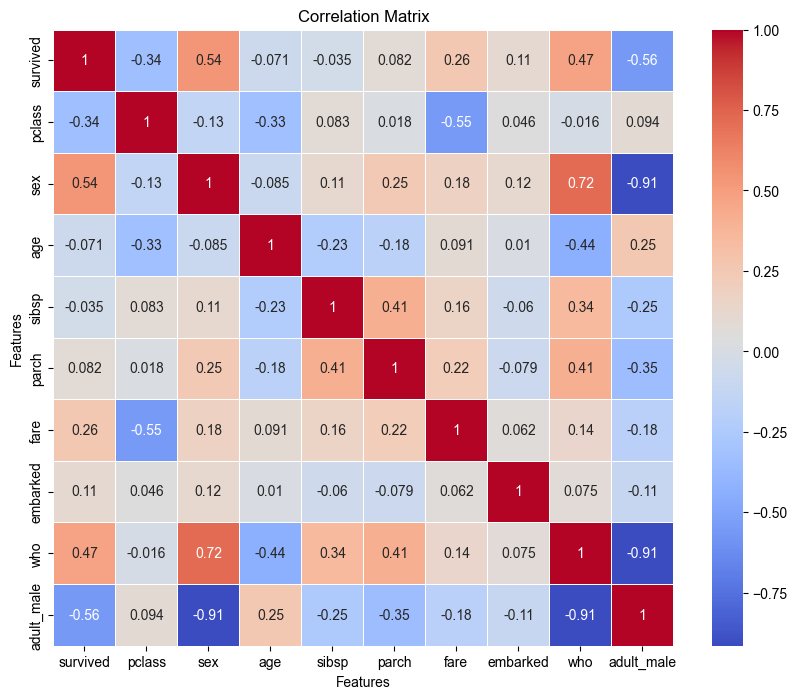

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = df.select_dtypes(include='number')
corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
sns.set(style="whitegrid")
plt.title('Correlation Matrix')  
plt.xlabel('Features') 
plt.ylabel('Features') 
plt.show()  

**Number of passengers survived the disaster:**

In [16]:
survived_count = df['survived'].value_counts()
print(survived_count)
print(f"number of survival: {df['survived'].value_counts()[1]}")

survived
0    549
1    342
Name: count, dtype: int64
number of survival: 342


**Number of female passengers aged more than 30 years.**

In [17]:
female_passengers = df[(df['sex'] == 1) & (df['age'] > 30)]
count_female_passengers = len(female_passengers)
print(f"count female passengers above 30: {count_female_passengers}")

count female passengers above 30: 103


**This are the passengers who embarked from Cherbourg ('C') and paid a fare greater than $100.**

In [18]:
cherbourg_passengers = df[(df['embarked'] == 1) & (df['fare'] > 100)]
print(f"cherbourg_passengers: {cherbourg_passengers}")

cherbourg_passengers:      survived  pclass  sex   age  sibsp  parch      fare  embarked  who  \
31          1       1    1   NaN      1      0  146.5208       1.0    1   
118         0       1    0  24.0      0      1  247.5208       1.0    0   
195         1       1    1  58.0      0      0  146.5208       1.0    1   
215         1       1    1  31.0      1      0  113.2750       1.0    1   
258         1       1    1  35.0      0      0  512.3292       1.0    1   
299         1       1    1  50.0      0      1  247.5208       1.0    1   
306         1       1    1   NaN      0      0  110.8833       1.0    1   
307         1       1    1  17.0      1      0  108.9000       1.0    1   
311         1       1    1  18.0      2      2  262.3750       1.0    1   
319         1       1    1  40.0      1      1  134.5000       1.0    1   
325         1       1    1  36.0      0      0  135.6333       1.0    1   
337         1       1    1  41.0      0      0  134.5000       1.0    1   
373

**We identified columns within the dataset containing missing values. Subsequently, we proposed and implemented a strategy to manage these missing values effectively.**

In [19]:
columns_with_missing_values = df.columns[df.isnull().any()]
print(columns_with_missing_values)
df.info()

Index(['age', 'embarked', 'deck'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         714 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    float64
 8   who         891 non-null    int64  
 9   adult_male  891 non-null    int64  
 10  deck        203 non-null    object 
 11  alone       891 non-null    bool   
dtypes: bool(1), float64(3), int64(7), object(1)
memory usage: 77.6+ KB


**Fill Age Missing Values**

We addressed missing values in the 'age' column by first visualizing its distribution through a histogram plot with 20 bins. After observing the distribution, we filled in the missing values with the mean age rounded to the nearest integer. Finally, we verified the changes by inspecting the DataFrame's information to ensure that there were no remaining missing values in the 'age' column.

C:\Users\HI\AppData\Local\Temp\ipykernel_22616\1712596088.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


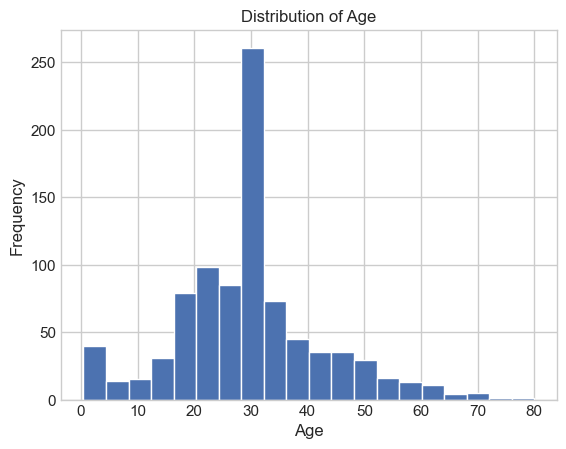

In [40]:
df['age'].plot(kind='hist', bins=20)
plt.style.use('seaborn-whitegrid')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


In [21]:
df['age'] = df['age'].fillna(round(df['age'].mean()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    float64
 8   who         891 non-null    int64  
 9   adult_male  891 non-null    int64  
 10  deck        203 non-null    object 
 11  alone       891 non-null    bool   
dtypes: bool(1), float64(3), int64(7), object(1)
memory usage: 77.6+ KB


**Fill embarked missing values**

To handle missing values in the 'embarked' column, we filled them with the mode value (the most frequently occurring value) using the `fillna()` method. Subsequently, we verified the changes by examining the DataFrame's information to confirm that there were no remaining missing values in the 'embarked' column.

In [22]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    float64
 8   who         891 non-null    int64  
 9   adult_male  891 non-null    int64  
 10  deck        203 non-null    object 
 11  alone       891 non-null    bool   
dtypes: bool(1), float64(3), int64(7), object(1)
memory usage: 77.6+ KB


We made the decision to drop the 'deck' column based on its missing values. By using the drop() method and specifying the 'deck' column, we removed it from the DataFrame. This action was taken to streamline the dataset, considering the significant number of missing values in the 'deck' column.

In [23]:
df.drop(columns=['deck'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    float64
 8   who         891 non-null    int64  
 9   adult_male  891 non-null    int64  
 10  alone       891 non-null    bool   
dtypes: bool(1), float64(3), int64(7)
memory usage: 70.6 KB


In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22.0,1,0,7.2500,0.0,0,1,False
1,1,1,1,38.0,1,0,71.2833,1.0,1,0,False
2,1,3,1,26.0,0,0,7.9250,0.0,1,0,True
3,1,1,1,35.0,1,0,53.1000,0.0,1,0,False
4,0,3,0,35.0,0,0,8.0500,0.0,0,1,True


**The average age of passengers on the ship**

In [25]:
average_age = df['age'].mean()
print(f"average age of passengers: {average_age}")

average age of passengers: 29.758888888888887


In [26]:
# the average age of passengers  males 
male_passengers = df[df['sex'] == 0]
average_age_males = male_passengers['age'].mean()
print(f"Average age of male passengers: {average_age_males}")
female_passengers = df[df['sex'] == 1]
average_age_females = female_passengers['age'].mean()
print(f"Average age of female passengers: {average_age_females}")


Average age of male passengers: 30.570485268630847
Average age of female passengers: 28.26751592356688


We investigated the correlation between the fare paid and survival rate. Subsequently, we generated a statistical summary to examine the relationship between these variables.

In [33]:
correlation = df['fare'].corr(df['survived'])
print("Correlation coefficient between fare and survival rate:", correlation)

print("\nStatistical summary of fare paid:")
print(df['fare'].describe())

print("\nStatistical summary of Survival rate:")
print(df['survived'].describe())

Correlation coefficient between fare and survival rate: 0.25730652238496227

Statistical summary of fare paid:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

Statistical summary of Survival rate:
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

Survival rate: 0.3838383838383838


We plotted the proportion of passengers who survived based on their class. This visualization allowed us to explore any potential differences in survival rates across different passenger classes.

C:\Users\HI\AppData\Local\Temp\ipykernel_22616\2383174709.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


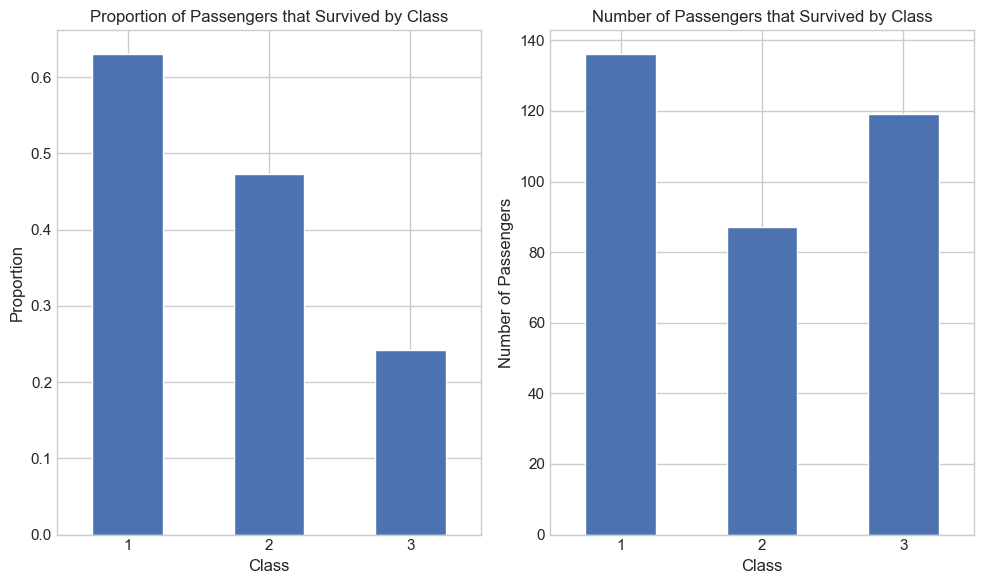

In [42]:
import matplotlib.pyplot as plt

survived_by_class = df.groupby('pclass')['survived'].mean()
survived_count = df.groupby('pclass')['survived'].sum()

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')
plt.subplot(1, 2, 1)
survived_by_class.plot(kind='bar')
plt.title('Proportion of Passengers that Survived by Class')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)


plt.subplot(1, 2, 2)
survived_count.plot(kind='bar')
plt.title('Number of Passengers that Survived by Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


We plotted the age distribution of passengers, distinguishing between those who survived and those who did not. This visualization provided insights into the age distribution of survivors compared to non-survivors among the passengers.

C:\Users\HI\AppData\Local\Temp\ipykernel_22616\3319493152.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


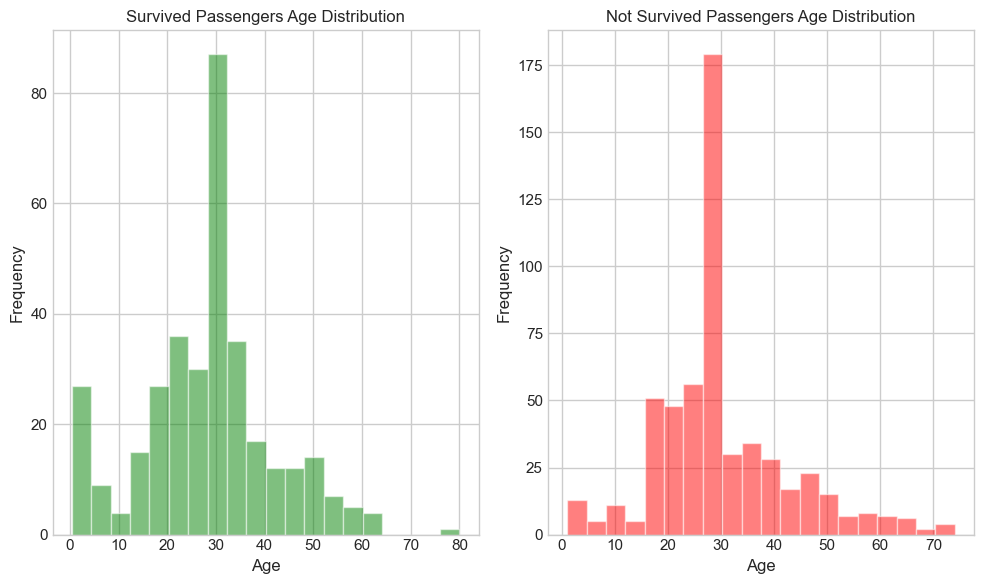

In [45]:
import matplotlib.pyplot as plt

survived_passengers = df[df['survived'] == 1]
not_survived_passengers = df[df['survived'] == 0]

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')
plt.subplot(1, 2, 1)
plt.hist(survived_passengers['age'].dropna(), bins=20, color='green', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Survived Passengers Age Distribution')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(not_survived_passengers['age'].dropna(), bins=20, color='red', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Not Survived Passengers Age Distribution')
plt.grid(True)

plt.tight_layout()
plt.show()


We created a scatter plot to visualize the relationship between age and fare paid, with data points color-coded based on survival status.

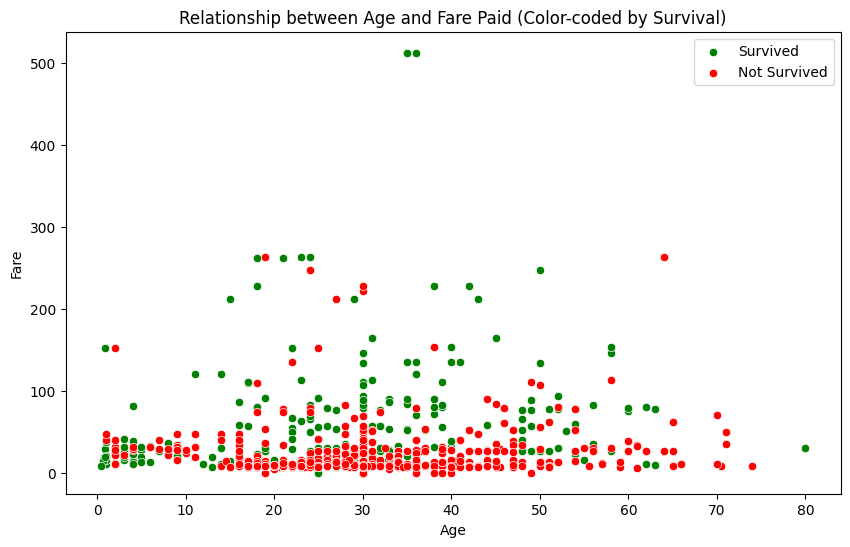

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
survived_passengers = df[df['survived'] == 1]
not_survived_passengers = df[df['survived'] == 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=survived_passengers, x='age', y='fare', color='green', label='Survived')
sns.scatterplot(data=not_survived_passengers, x='age', y='fare', color='red', label='Not Survived')


plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship between Age and Fare Paid (Color-coded by Survival)')
plt.legend()

plt.show()


We generated a pivot table to display the average fare and survival rate for each combination of class and sex. 

In [31]:
pivot_table = df.pivot_table(values=['fare', 'survived'], index=['pclass', 'sex'], aggfunc={'fare': 'mean', 'survived': 'mean'})
print(pivot_table)

                  fare  survived
pclass sex                      
1      0     67.226127  0.368852
       1    106.125798  0.968085
2      0     19.741782  0.157407
       1     21.970121  0.921053
3      0     12.661633  0.135447
       1     16.118810  0.500000


We created a grouped bar chart using Matplotlib to illustrate the average fare paid by passengers, categorized by both their class and survival status. This visualization enabled us to compare the average fares across various passenger classes and ascertain any differences based on survival outcomes.

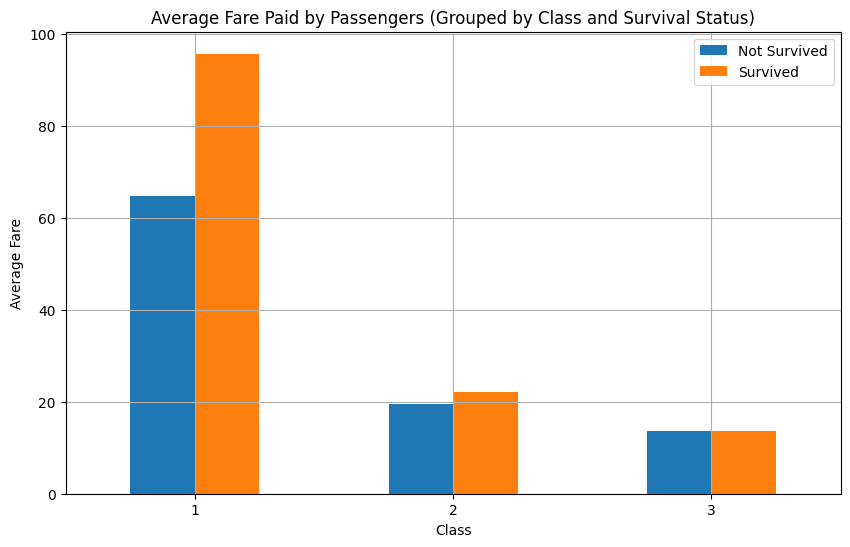

In [32]:
import matplotlib.pyplot as plt

grouped = df.groupby(['pclass', 'survived'])['fare'].mean().unstack()
grouped.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Class')
plt.ylabel('Average Fare')
plt.title('Average Fare Paid by Passengers (Grouped by Class and Survival Status)')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'])
plt.grid(True)
plt.show()


# Task 2: Data Scientists Salaries

## Description

In this task we are given a dataset consisting salaries of data scientists from 2020 to 2024 and we are asked to perform Exploratory Data Analysis on it.

## Preprocessing

First, we have to do some preprocessing on our data to prepare it for the Analysis. 

### Loading the Data

we load the dataset into a Data Frame and look at the first and last few rows to understand the structure of the data.  


In [1]:
import pandas as pd

df = pd.read_csv('task2.csv')

In [2]:
df.head()

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium


In [3]:
df.tail()

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
13967,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large
13968,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large
13969,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S
13970,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large
13971,2021,Senior-Level,Full-Time,Data Science Manager,7000000,INR,50,Large


### Handling Missing Values and Duplicates

Then we check for missing values and data types of the columns. We see that there are no missing values and we shouldn't do anything about it. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         13972 non-null  int64 
 1   Experience_Level  13972 non-null  object
 2   Employment_Type   13972 non-null  object
 3   Job_Title         13972 non-null  object
 4   Salary            13972 non-null  int64 
 5   Salary_Currency   13972 non-null  object
 6   Remote_Ratio      13972 non-null  int64 
 7   Company_Size      13972 non-null  object
dtypes: int64(3), object(5)
memory usage: 873.4+ KB


In [5]:
df.isnull().sum()

Work_Year           0
Experience_Level    0
Employment_Type     0
Job_Title           0
Salary              0
Salary_Currency     0
Remote_Ratio        0
Company_Size        0
dtype: int64

Now we check for duplicates and remove them. We see that we have around 5000 duplicates.

In [6]:
print(f"Before dropping duplicates: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"After dropping duplicates: {len(df)}")

Before dropping duplicates: 13972
After dropping duplicates: 8407


### Currency Conversion

Before analyzing people's salaries in this dataset we have to convert all salaries to a common currency. We see that the salaries are in different currencies and we have to convert them to USD which is the most common currency. We also drop those rows which use a currency that is rare(less than 10 occurrences) in the dataset.

In [7]:
df['Salary_Currency'].value_counts()

Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
PLN       7
CHF       6
SGD       6
JPY       4
BRL       4
DKK       3
HUF       3
TRY       3
NOK       2
THB       2
ZAR       1
HKD       1
ILS       1
PHP       1
NZD       1
MXN       1
CLP       1
Name: count, dtype: int64

In [8]:
df = df[df['Salary_Currency'].map(df['Salary_Currency'].value_counts()) > 10]

In [9]:
df['Salary_Currency'].value_counts()

Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
Name: count, dtype: int64

We use `forex-python` library to convert the currencies to USD. We also drop the `Currency` column as it is no longer needed. We can also see that the standard deviation of the `Salary` column decreases because of the conversion.

In [10]:
df["Salary"].describe().apply(lambda x: format(x, 'f'))

count       8360.000000
mean      163002.712919
std       242831.641724
min        14000.000000
25%        96000.000000
50%       140000.000000
75%       188000.000000
max      7500000.000000
Name: Salary, dtype: object

In [11]:
from forex_python.converter import CurrencyRates
c = CurrencyRates()
rate = {}
for currency in df['Salary_Currency'].unique():
    rate[currency] = c.get_rate(currency, 'USD')
df['Salary'] = df.apply(lambda x: x['Salary'] * rate[x['Salary_Currency']], axis=1)

In [12]:
df["Salary"].describe()

count      8360.000000
mean     147311.232093
std       73103.473506
min       14456.682871
25%       96000.000000
50%      139000.000000
75%      186000.000000
max      800000.000000
Name: Salary, dtype: float64

In [13]:
df.drop(columns=['Salary_Currency'], inplace=True)

### Checking Columns' Unique Values

Now we check the unique values of the columns to make sure that the data is clean.

In [14]:
df['Work_Year'].unique()

array([2024, 2023, 2022, 2020, 2021], dtype=int64)

we convert the `Work_Year` data type to `str` so that we can use it as a categorical variable in the analysis.

In [15]:
df['Work_Year'] = df['Work_Year'].astype(str)

In [16]:
df['Experience_Level'].unique()

array(['Senior-Level', 'Mid-Level', 'Entry-Level', 'Executive-Level'],
      dtype=object)

In [17]:
df['Employment_Type'].unique()

array(['Full-Time', 'Contract', 'Part-Time', 'Freelance'], dtype=object)

In [18]:
df['Remote_Ratio'].unique()

array([  0, 100,  50], dtype=int64)

We convert the `Remote_Ratio` column to a categorical column as below:
- 0: Not Remote
- 50: Hybrid Remote
- 100: Remote

In [19]:
df['Remote_Ratio'] = df['Remote_Ratio'].replace({0: 'Not Remote', 50: 'Hybrid Remote', 100: 'Remote'})

In [20]:
df['Remote_Ratio'].unique()

array(['Not Remote', 'Remote', 'Hybrid Remote'], dtype=object)

In [21]:
df['Company_Size'].unique()

array(['Large', 'Medium', 'S'], dtype=object)

For cleaning purposes, we replace S with Small in the `Company_Size` column.

In [22]:
df['Company_Size'] = df['Company_Size'].replace('S', 'Small')

In [23]:
df['Company_Size'].unique()

array(['Large', 'Medium', 'Small'], dtype=object)

In [24]:
df['Job_Title'].unique()

array(['AI Engineer', 'Machine Learning Engineer',
       'Business Intelligence Developer', 'Data Engineer',
       'Data Scientist', 'Cloud Database Engineer', 'Research Engineer',
       'Data Analyst', 'Machine Learning Scientist', 'Applied Scientist',
       'Data Science Manager', 'Research Scientist', 'Prompt Engineer',
       'Data Science', 'Data Science Consultant',
       'Data Management Analyst', 'Research Analyst',
       'Data Operations Analyst', 'Data Management Consultant',
       'Business Intelligence Analyst', 'Analytics Engineer',
       'Data Quality Analyst', 'Data Architect', 'Data Manager',
       'ML Engineer', 'Robotics Software Engineer',
       'Machine Learning Researcher', 'AI Architect',
       'Data DevOps Engineer', 'Business Intelligence',
       'AI Software Engineer', 'Data Integration Engineer',
       'Data Operations Specialist', 'BI Analyst', 'Data Product Manager',
       'Business Intelligence Engineer', 'Data Specialist',
       'AI Research

There's an big issue in the `Job_Title` column. We see that there are many identical job titles with different namings. For example, we have `Data Science` and `Data Scientist` which are the same or we have `ML Engineer` and `Machine Learning Engineer` which are also the same. We check all of the titles and converts them to a common naming. 

In [25]:
df['Job_Title'] = df['Job_Title'].replace('Data Science', 'Data Scientist')
df['Job_Title'] = df['Job_Title'].replace('ML Engineer', 'Machine Learning Engineer')
df['Job_Title'] = df['Job_Title'].replace('Machine Learning Operations Engineer', 'ML Ops Engineer')
df['Job_Title'] = df['Job_Title'].replace('MLOps Engineer', 'ML Ops Engineer')
df['Job_Title'] = df['Job_Title'].replace('BI', 'Business Intelligence', regex=True)

This column is still not completely clean but it is better than before.

## Analysis

### Distribution of Salaries

Now that we have preprocessed our data, we can start analyzing it. We first look at the distribution of salaries in the dataset. We use histogram to visualize the distribution and we use the Scott's rule for number of bins:
- `Scott's Rule`:
         $$Bin \ Width = \frac{3.5 \sigma}{n^{1/3}}$$

We can infer the following from the histogram:

- We can see that the distribution is right-skewed and most of the salaries are between 0 and 200000 USD.
- Right-skewness is common in salary distributions as a small percentage of individuals earn exceptionally high salaries, while the majority earn lower incomes. 

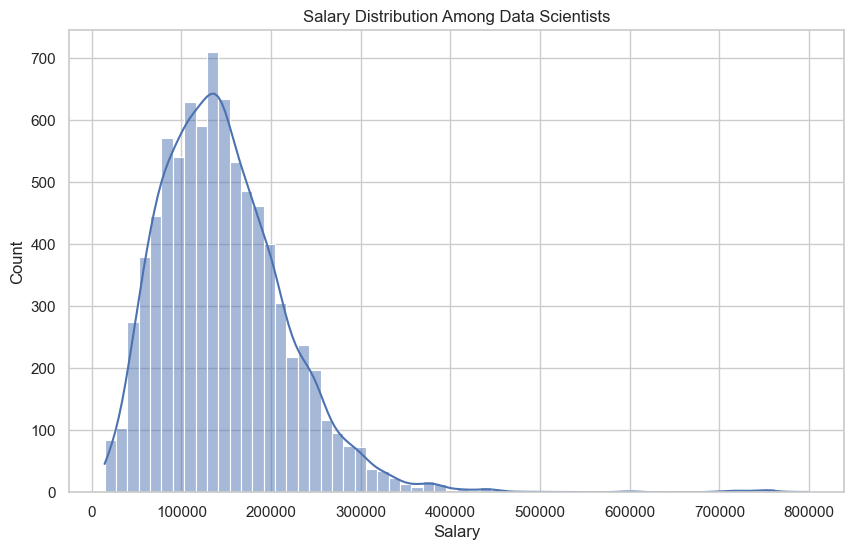

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

def calc_num_of_bins_scott_rule(data):
    num_bins = int((max(data) - min(data)) / (3.5 * np.std(data) / len(data) ** (1/3)))
    return num_bins

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(df['Salary'], bins=calc_num_of_bins_scott_rule(df['Salary']), kde=True)
plt.title('Salary Distribution Among Data Scientists')
plt.show()

We also look at the box plot and violin plot of the salaries. 
- Again we can see that most of the salaries are between 0 and 200000 USD and there's a right-skewness in the distribution.
- We can also see that most of the outliers earn between 300000 and 500000 USD but there are some outliers who earn more than 700000 USD which we will investigate later.

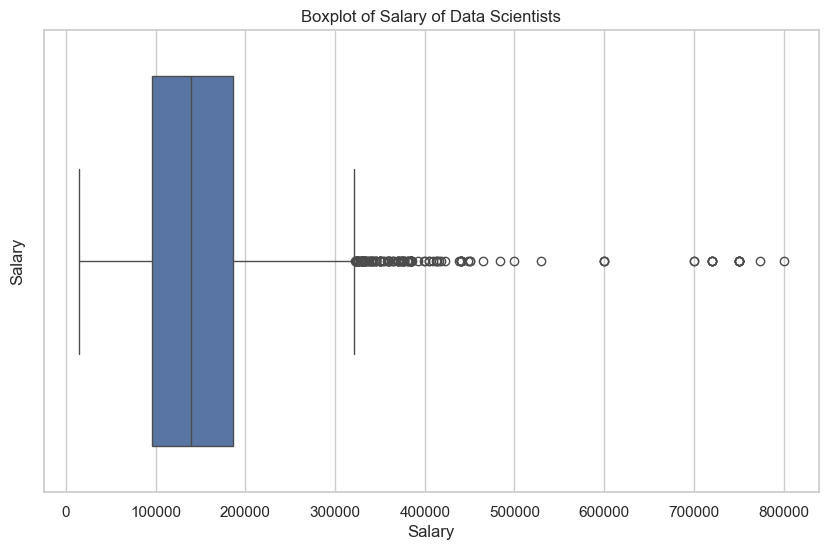

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Salary'])
plt.title('Boxplot of Salary of Data Scientists')
plt.ylabel('Salary')
plt.show()

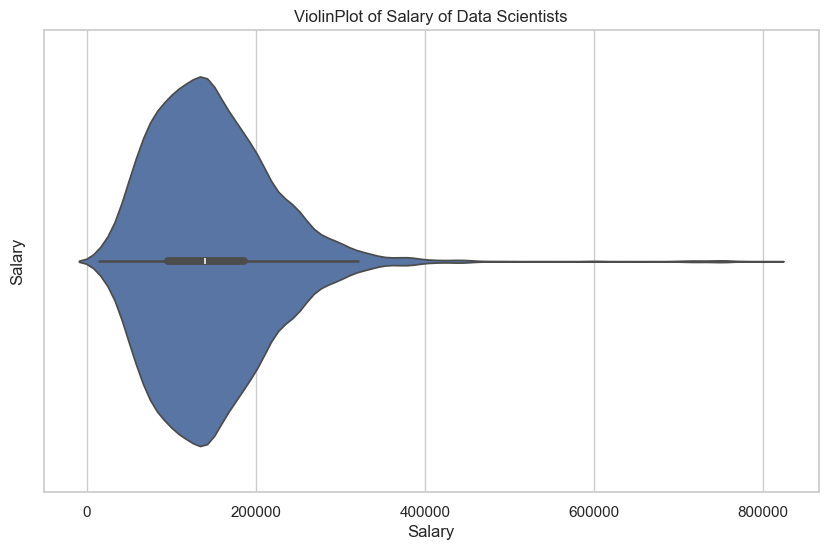

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Salary'])
plt.title('ViolinPlot of Salary of Data Scientists')
plt.ylabel('Salary')
plt.show()

In the end we use panda's `skew` function to calculate the skewness of the `Salary` column with the formula below:
- `Skewness`:
         $$\gamma = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^3}{(n-1) \cdot s^3}$$


if the skewness value is near 0 then the distribution is approximately symmetric. If the skewness value is less than -1 or greater than 1 then the distribution is substantially skewed.

we see that it is 1.69 which confirms our observation that the distribution is substantial right-skewed.

In [29]:
df['Salary'].skew()

1.6918820170336728

### Job Titles

#### Popular Jobs

Now we want to see which job titles are more common and which job titles earn more. We first look at the top 10 most common job titles:

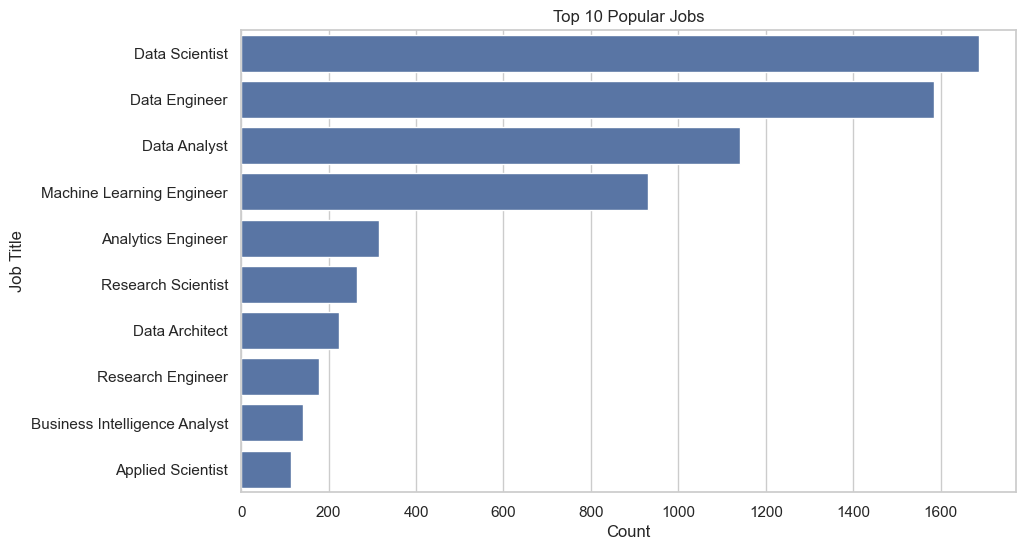

In [30]:
top_10_popular_jobs = df['Job_Title'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_popular_jobs.values, y=top_10_popular_jobs.index)
plt.title('Top 10 Popular Jobs in Data Science Field')
plt.ylabel('Job Title')
plt.xlabel('Count')
plt.show()

As you can see, The three most common jobs are `Data Scientist`, `Data Engineer`, and `Data Analyst` which all three of them are more related to data science rather than AI or ML. In fact, Only `Machine Learning Engineer` is directly involved with ML in the popular jobs so in general, we can see that the most common job titles in data science are not directly related to AI or ML.





#### High Earning Jobs

Now we see which job titles earn more. First, We remove the jobs that have less than 50 occurrences in this analysis to make sure that the results are reliable. Then we calculate the median salary of each job title and sort them in descending order. The reason that we choose median is that the distribution is right-skewed and median is also less sensitive to outliers than the mean.

In [38]:
frequent_jobs_df = df[df['Job_Title'].map(df['Job_Title'].value_counts()) > 50]
frequent_jobs_df['Job_Title'].nunique()

18

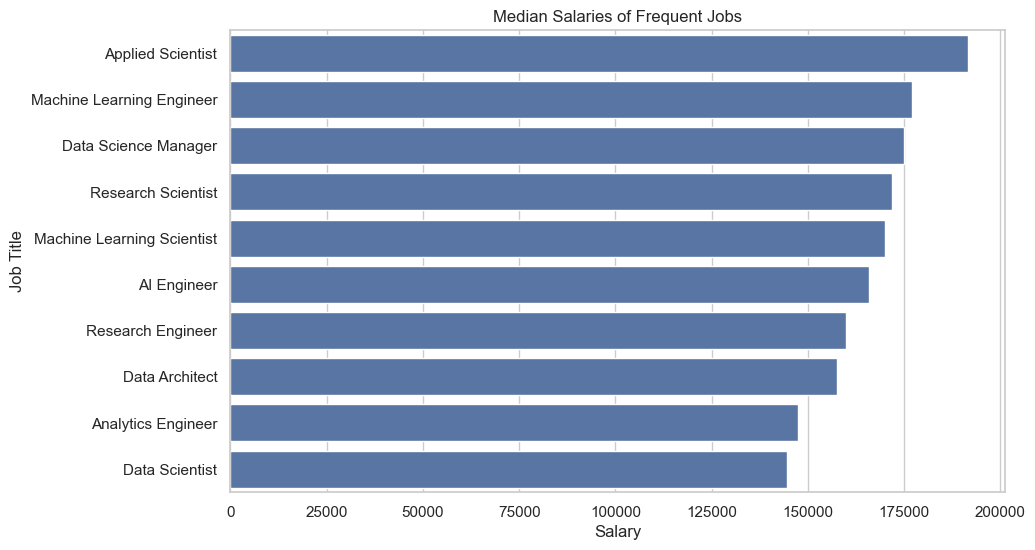

In [40]:
median_salaries = frequent_jobs_df.groupby('Job_Title')['Salary'].median().nlargest(10).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=median_salaries.values, y=median_salaries.index)
plt.title('Median Salaries of Frequent Jobs')
plt.xlabel('Salary')
plt.ylabel('Job Title')
plt.show()

We see that although the most common jobs are not directly related to AI or ML, the high earning jobs are more related to AI or ML so AI, ML jobs are not as common as other data science jobs like `Data Scientist` but they earn more.

### Salary by Year and Remote Ratio

In this part, we want to see how the salaries change over the years and how the remote ratio affects the salaries. First, We only analyze the `Work_Year` column. We check the how much of data belongs to each year:

In [43]:
df['Work_Year'].value_counts()

Work_Year
2023    4486
2024    2512
2022    1089
2021     202
2020      71
Name: count, dtype: int64

As you can see the data is not equally distributed among the years. We have much less data for 2020 and 2021 compared to other years so we have to keep this in mind in our analysis.

Now we calculate the median salary for each year and plot it:

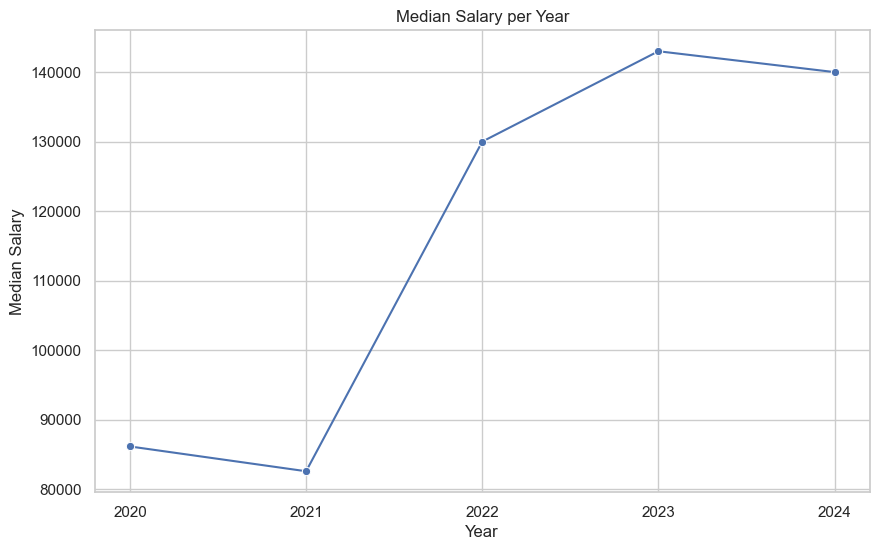

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

median_salary_per_year = df.groupby('Work_Year')['Salary'].median().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Work_Year', y='Salary', data=median_salary_per_year, marker='o')
plt.title('Median Salary per Year')
plt.xlabel('Year')
plt.ylabel('Median Salary')
plt.show()



We can see that the median salary increases dramatically from 2021 to 2022 which also the year that in our data the number of data points increases dramatically. 
- One of the reasons that comes to mind is that from 2021 to 2022 the need for data scientists increased dramatically and the salaries increased because of the demand. It's sensible because in those years AI and ML technologies grew rapidly and the need for data scientists increased.
- The other reason might be because of Remote work and Corona Virus. We check this idea later.
- The other reason might be because of the data we have. We have much less data for 2020 and 2021 compared to other years so the data might not be reliable.

We plot the distribution of salaries for each year to see if the distribution is different for each year and whether we can rely on 2020 and 2021 data or not:

- As you can see the distribution in 2020 and 2021 is not too different from other years so we can't rule out the data because of the distribution.
- The other thing we can see is that the salaries that are more than 700000 USD are mostly from 2023 and 2024 which is interesting and we will investigate it later.


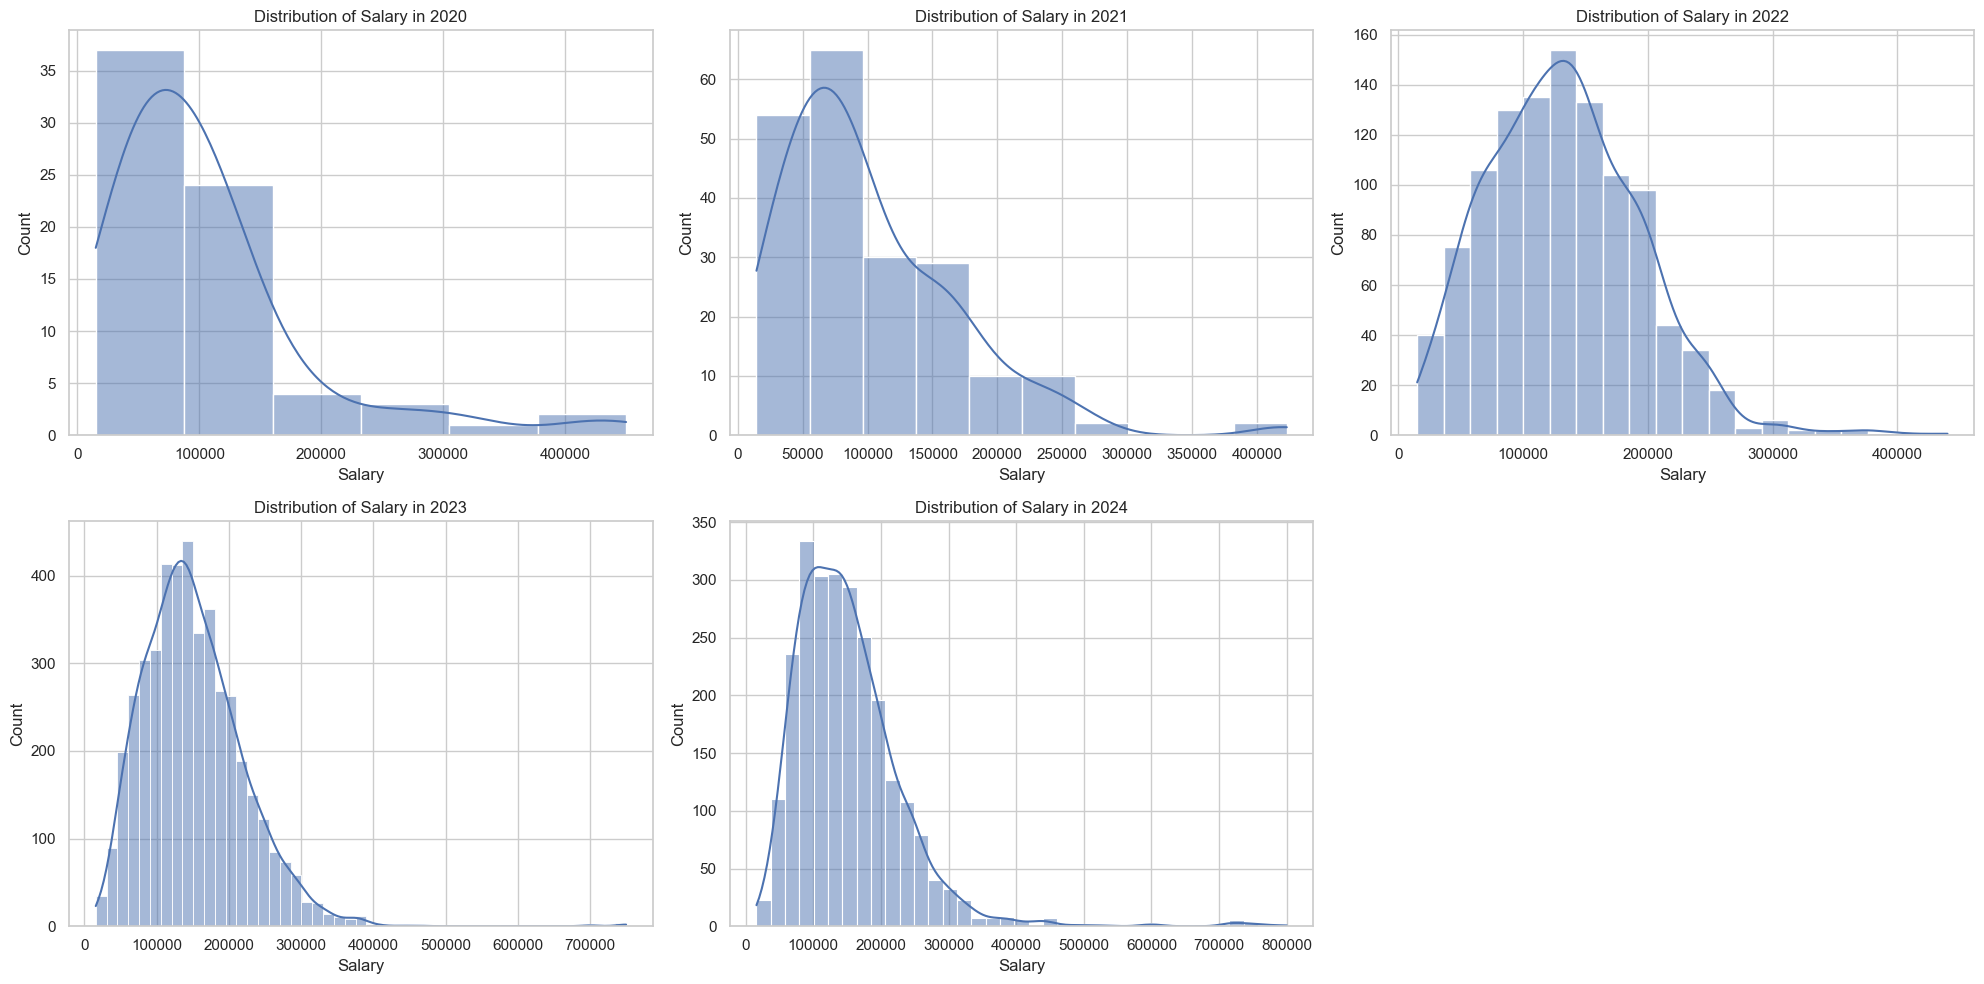

In [93]:
axs, fig = plt.subplots(2, df['Work_Year'].nunique() // 2 + 1 , figsize=(20, 10))
fig = fig.flatten()

years = sorted(list(df['Work_Year'].unique()))

for i, year in enumerate(years):
    data = df[df['Work_Year'] == year]['Salary']
    sns.histplot(data, bins=calc_num_of_bins_scott_rule(data), kde=True, ax=fig[i])
    fig[i].set_title(f'Distribution of Salary in {year}')
    fig[i].set_ylabel('Count')
    fig[i].set_xlabel('Salary')
    #print(f"Skewness of {year} year: {df[df['Work_Year'] == year]['Salary'].skew()}")

fig[-1].axis('off')
    
plt.tight_layout()
plt.show()



Now we check this hypothesis that the increase in salaries might be because of Remote work and Corona Virus. First we check the the number of data points for each Remote Ratio:

In [140]:
df['Remote_Ratio'].value_counts()

Remote_Ratio
Not Remote       5157
Remote           2987
Hybrid Remote     216
Name: count, dtype: int64

We can see that the number of data points for `Hybrid Remote` is much less than the other two so we have to keep this in mind in our analysis. 

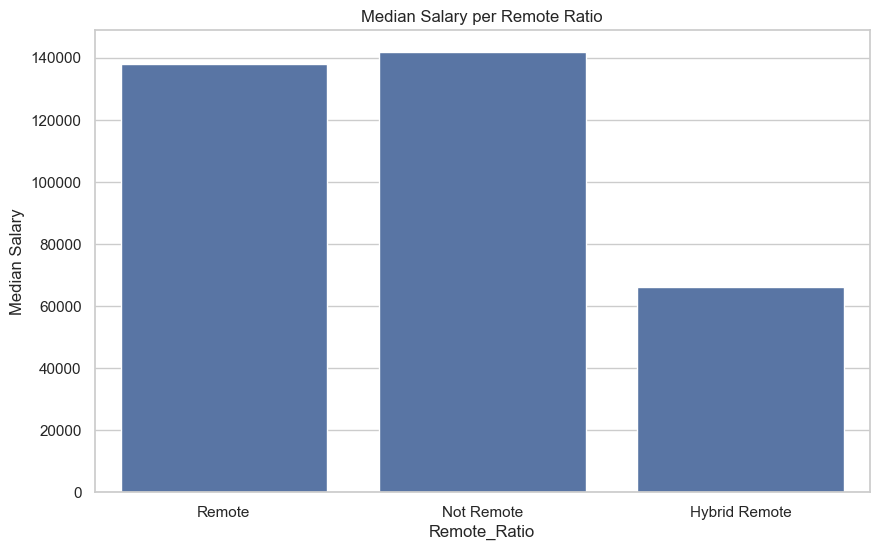

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

median_salary_per_remote_ratio = df.groupby('Remote_Ratio')['Salary'].median().reset_index()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x='Remote_Ratio', y='Salary', data=median_salary_per_remote_ratio)
plt.title('Median Salary per Remote Ratio')
plt.xlabel('Remote_Ratio')
plt.ylabel('Median Salary')
plt.show()



As you can see there's a slight increase in salary when the person doesn't work remotely but the difference is not too much. The interesting thing is that the salaries for `Hybrid Remote` are much lower than the other two.

Now we plot the percentage of `Remote Ratio` for each year:

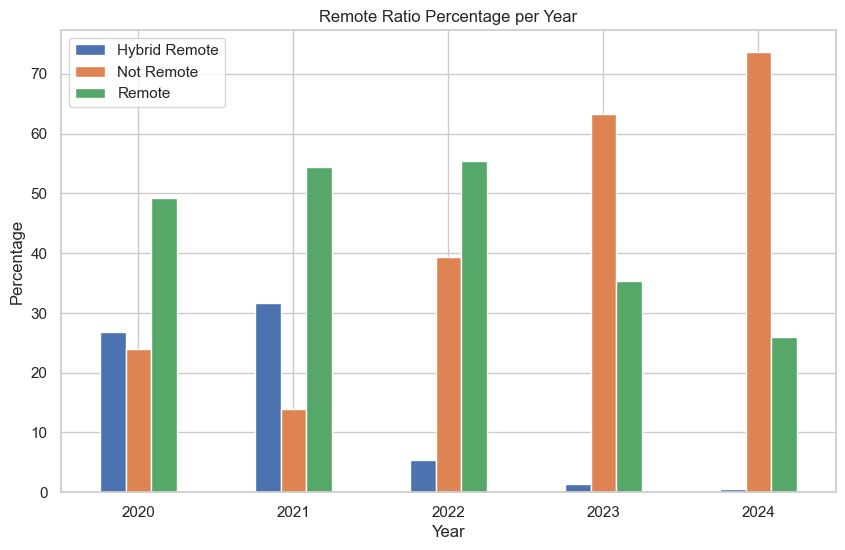

In [107]:
grouped = df.groupby(['Work_Year', 'Remote_Ratio']).size().reset_index(name='count')
total_per_year = df.groupby('Work_Year').size().reset_index(name='total')
grouped = pd.merge(grouped, total_per_year, on='Work_Year')
grouped['percentage'] = (grouped['count'] / grouped['total']) * 100
remoteness_percentage_per_year = grouped.pivot(index='Work_Year', columns='Remote_Ratio', values='percentage')
 
remoteness_percentage_per_year.plot(kind='bar', figsize=(10, 6)) 
plt.xlabel('Year') 
plt.ylabel('Percentage') 
plt.title('Remote Ratio Percentage per Year') 
plt.xticks(rotation=0) 
plt.legend(list(remoteness_percentage_per_year.columns)) 
plt.grid(True) 
plt.show()


- As you can see during the years, the percentage of people who work remotely decreased and the percentage of people who work not remotely increased. This is probably because of the Corona Virus. This can also be one of the reasons that the salaries increased during the years because the people who work not remotely earn more.
- The other interesting thing is that the percentage of people who work Hybrid Remote decreases dramatically from 2021 to 2022.

We also plot the salary change by year for each remote ratio:

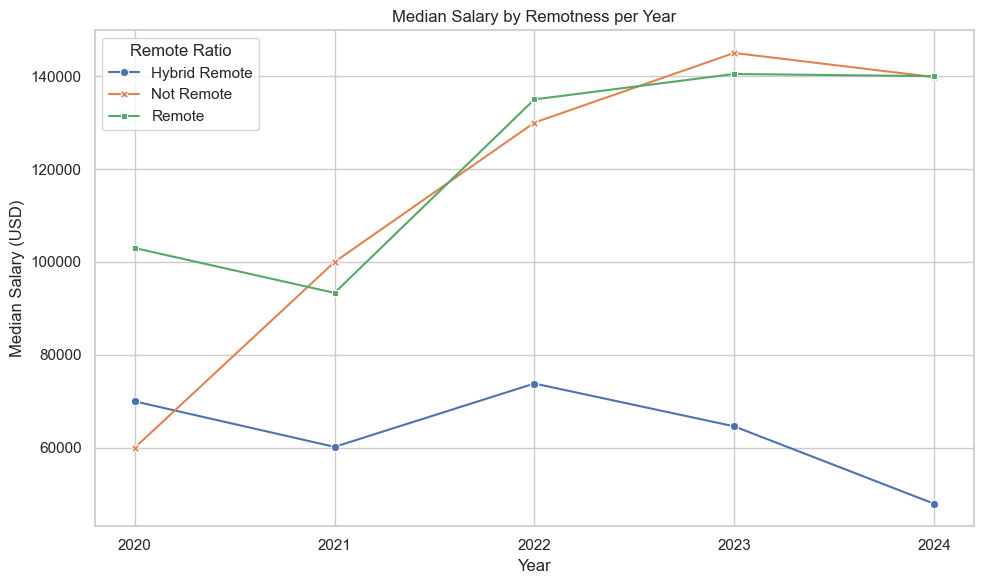

In [101]:
grouped_data = df.groupby(['Work_Year', 'Remote_Ratio'])['Salary'].median().unstack()


plt.figure(figsize=(10, 6))  
sns.lineplot(data=grouped_data, markers=True, dashes=False)
plt.title('Median Salary by Remotness per Year')
plt.xlabel('Year')
plt.ylabel('Median Salary (USD)')
plt.grid(True)
plt.legend(title='Remote Ratio')
#sns.lineplot(x='Work_Year', y='Salary', label='total', data=median_salary_per_year, color='purple', marker='*')

plt.tight_layout()
plt.show()

### Salary by Company Size and Experience Level

In this part, we want to see how the salaries change with the company size and experience level. First, we only analyze the `Company_Size` column. We check the how much of data belongs to each company size:

In [102]:
df['Company_Size'].value_counts()

Company_Size
Medium    7610
Large      585
Small      165
Name: count, dtype: int64

We see that most of the data belongs to Medium companies.

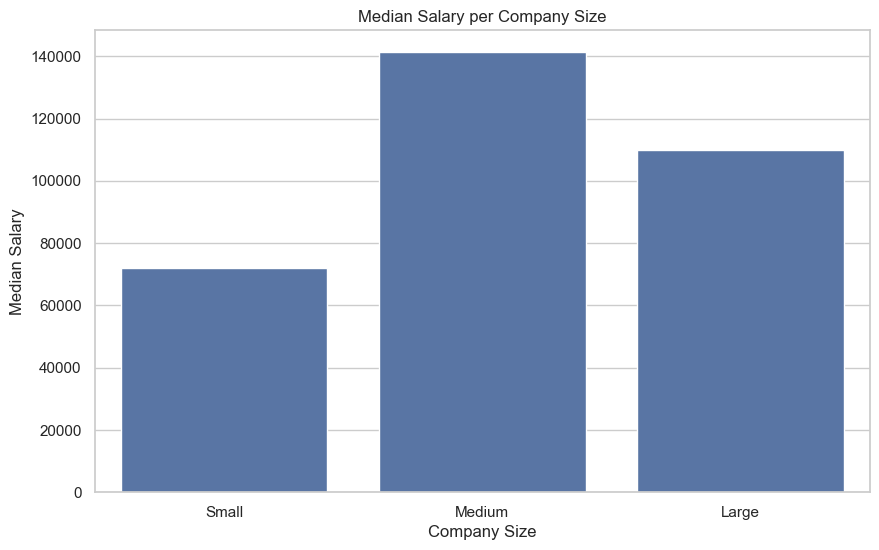

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

median_salary_per_company_size = df.groupby('Company_Size')['Salary'].median().reset_index()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x='Company_Size', y='Salary', data=median_salary_per_company_size)
plt.title('Median Salary per Company Size')
plt.xlabel('Company Size')
plt.ylabel('Median Salary')
plt.show()



We can see that the salaries are higher for Medium companies.

Now we try to see how the salaries change with the experience level and whether it affects the salaries in different company sizes or not.

In [111]:
df['Experience_Level'].value_counts()

Experience_Level
Senior-Level       5010
Mid-Level          2234
Entry-Level         793
Executive-Level     323
Name: count, dtype: int64

In [110]:
median_salary_per_experience = df.groupby('Experience_Level')['Salary'].median().reset_index()
median_salary_per_experience

,Experience_Level,Salary
0,Entry-Level,80000.000000
1,Executive-Level,188680.567724
2,Mid-Level,112000.000000
3,Senior-Level,154600.000000


In [111]:
order = [0, 2, 3, 1]
median_salary_per_experience = median_salary_per_experience.iloc[order]
median_salary_per_experience

,Experience_Level,Salary
0,Entry-Level,80000.000000
2,Mid-Level,112000.000000
3,Senior-Level,154600.000000
1,Executive-Level,188680.567724


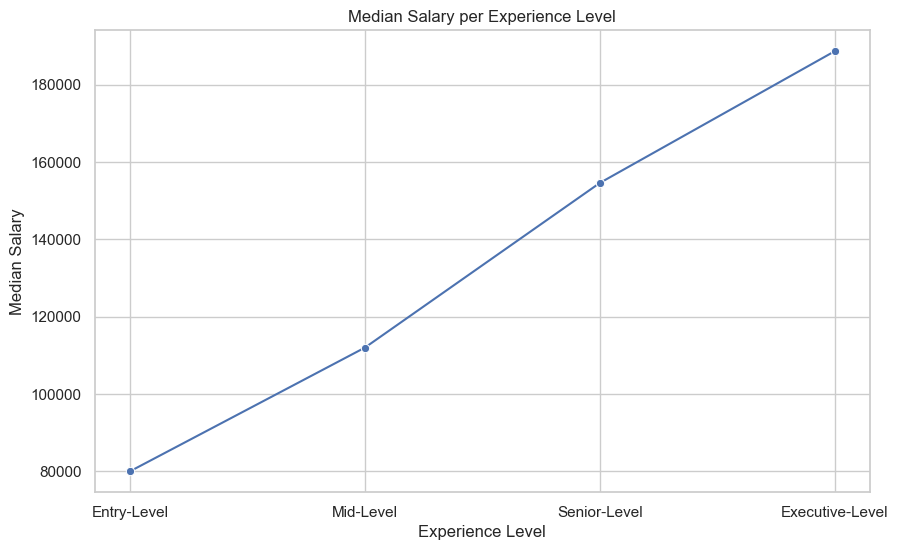

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(x='Experience_Level', y='Salary', data=median_salary_per_experience, marker='o')
plt.title('Median Salary per Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Salary')
plt.show()



- As expected, the salaries increase with the experience level.
- This difference between the salaries for different experience levels is the same and it's linear.

Now we check the percentage of each experience level for each company size:

- Medium companies have more senior-level people than Large companies.
- Large companies have more entry-level and mid-level people than medium compaines.
- The ratio of senior-level people in Small companies is lower than other companies.

These could be the reasons that the salaries are higher for Medium companies.

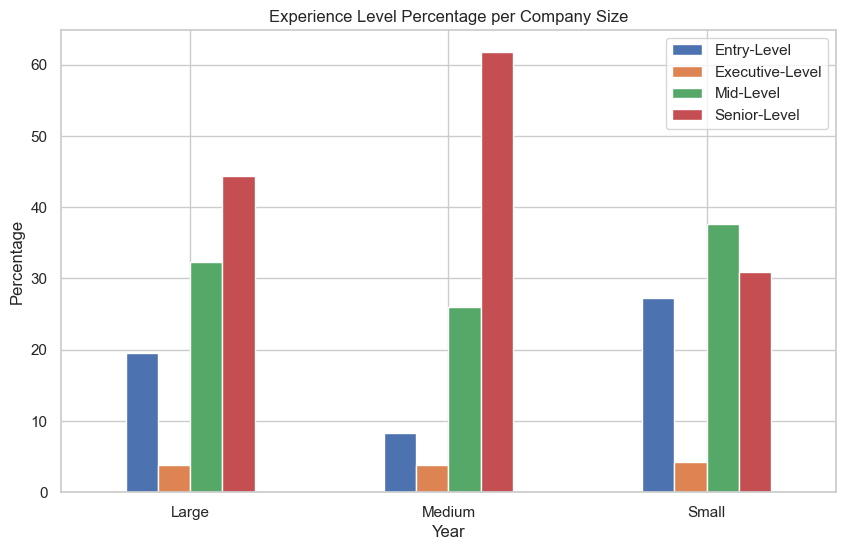

In [113]:
grouped = df.groupby(['Company_Size', 'Experience_Level']).size().reset_index(name='count')
total_per_year = df.groupby('Company_Size').size().reset_index(name='total')
grouped = pd.merge(grouped, total_per_year, on='Company_Size')
grouped['percentage'] = (grouped['count'] / grouped['total']) * 100
remoteness_percentage_per_year = grouped.pivot(index='Company_Size', columns='Experience_Level', values='percentage')
 
remoteness_percentage_per_year.plot(kind='bar', figsize=(10, 6)) 
plt.xlabel('Year') 
plt.ylabel('Percentage') 
plt.title('Experience Level Percentage per Company Size') 
plt.xticks(rotation=0) 
plt.legend(list(remoteness_percentage_per_year.columns)) 
plt.grid(True) 
plt.show()


We also plot the salary change by company size for each experience level:

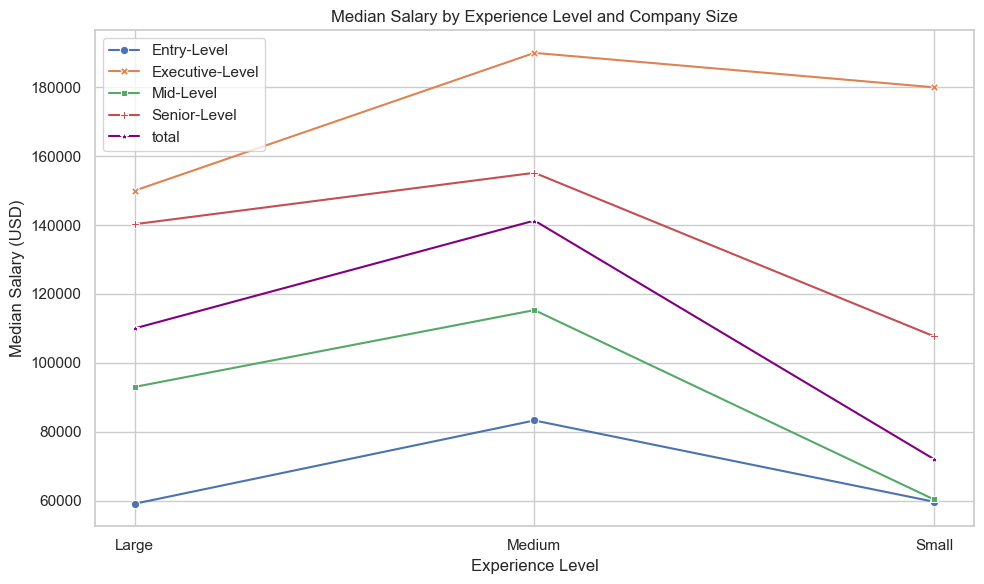

In [175]:
grouped_data = df.groupby(['Company_Size', 'Experience_Level'])['Salary'].median().unstack()


plt.figure(figsize=(10, 6))  
sns.lineplot(data=grouped_data, markers=True, dashes=False)
plt.title('Median Salary by Experience Level and Company Size')
plt.xlabel('Experience Level')
plt.ylabel('Median Salary (USD)')
plt.grid(True)
plt.legend(title='Experience_Level')
sns.lineplot(x='Company_Size', y='Salary', label='total', data=median_salary_per_company_size, color='purple', marker='*')

plt.tight_layout()
plt.show()

### Employment type

We can see that almost all of the data belongs to Full-time employees so we can't compare this column with the salary column or the other columns.

In [115]:
df['Employment_Type'].value_counts()

Employment_Type
Full-Time    8304
Contract       25
Part-Time      19
Freelance      12
Name: count, dtype: int64

### Outliers

Now we check the outliers in the dataset. We use the IQR method to detect the outliers. We calculate the IQR for the `Salary` column and then we find the outliers. 

In [115]:
def find_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers
    
outliers = find_outliers(df, 'Salary')

outliers.head()

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Remote_Ratio,Company_Size
63,2024,Senior-Level,Full-Time,Research Scientist,600000.0,Not Remote,Medium
65,2024,Senior-Level,Full-Time,Prompt Engineer,600000.0,Not Remote,Medium
73,2024,Senior-Level,Full-Time,Research Scientist,500000.0,Remote,Medium
103,2024,Executive-Level,Full-Time,Data Engineer,334075.0,Not Remote,Medium
129,2024,Senior-Level,Full-Time,Research Scientist,333500.0,Not Remote,Medium


In [123]:
outliers.describe()

,Salary
count,154.000000
mean,409533.172851
std,123887.155978
min,322000.000000
25%,333500.000000
50%,367815.000000
75%,413500.000000
max,800000.000000


- We see that most of the outliers are in Senior-Level not in Executive-Level.
- Surprisingly we have less outliers in the Executive-Level than Mid-Level. It's strange that Mid-Level people earn that much so this data might not be reliable.

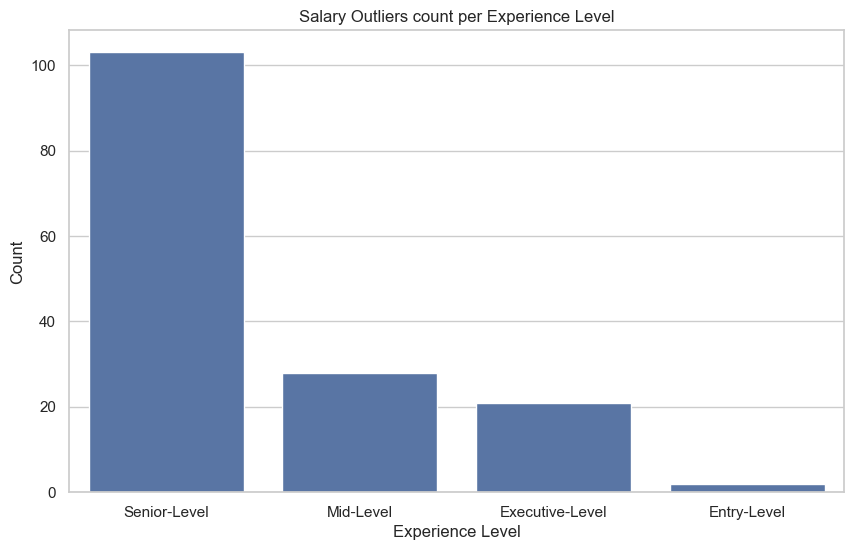

In [126]:
median_salary_per_experience = outliers['Experience_Level'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=median_salary_per_experience.index, y=median_salary_per_experience.values)
plt.title('Salary Outliers count per Experience Level')
plt.ylabel('Count')
plt.xlabel('Experience Level')
plt.show()

In Box Plot we saw that we had few people who had more than 700000 USD salary(They were outliers in outliers!) so now we check them:

In [124]:
df[df['Salary'] > 700000]

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Remote_Ratio,Company_Size
242,2024,Mid-Level,Full-Time,AI Architect,800000.0,Remote,Medium
1085,2024,Entry-Level,Full-Time,Data Analyst,774000.0,Not Remote,Medium
1093,2024,Mid-Level,Full-Time,Analytics Engineer,720000.0,Not Remote,Medium
1568,2024,Senior-Level,Full-Time,Analytics Engineer,720000.0,Not Remote,Medium
1748,2024,Senior-Level,Full-Time,Data Scientist,720000.0,Not Remote,Medium
1884,2024,Senior-Level,Full-Time,Analytics Engineer,750000.0,Not Remote,Medium
2060,2024,Mid-Level,Full-Time,Machine Learning Scientist,750000.0,Not Remote,Medium
2471,2024,Senior-Level,Full-Time,Data Analyst,750000.0,Not Remote,Medium
3276,2024,Mid-Level,Full-Time,Research Engineer,720000.0,Not Remote,Medium
3286,2024,Mid-Level,Full-Time,Research Scientist,720000.0,Not Remote,Medium


I Believe that these people are not real and they are just mistakes in the data because they are mostly Mid-Level and also they are mostly from 2024. 